In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from pylab import rcParams
import sklearn
from sklearn import neighbors, datasets
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.collections import LineCollection
import bezier
import networkx as nx
import fa2
from fa2 import ForceAtlas2
import jupyterthemes as jt
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
# Set Jupyter Notebook theme
set_nb_theme('monokai')

In [5]:
# Load data and print dataframe
df = pd.read_excel('/Users/Vincent/Downloads/Qualtrix dataset-1.xlsx')
print (df)

    5  5.1  5.2  5.3  5.4  118  1  1.1  0  1.2  ...   1.6  0.8571428571428571  \
0   4    4    4    4    4  109  1    0  0    0  ...  0.80            0.142857   
1   4    4    4    4    4  110  1    1  0    1  ...  0.80            0.571429   
2   4    4    4    4    4  128  1    1  0    1  ...  0.80            0.857143   
3   5    4    3    5    5  137  1    1  0    1  ...  0.88            0.571429   
4   4    5    5    3    3  145  1    1  0    1  ...  0.80            0.857143   
5   4    3    4    3    4  140  0    1  1    1  ...  0.72            0.714286   
6   3    3    3    3    3  105  0    0  0    0  ...  0.60            0.142857   
7   4    4    4    3    4  117  1    1  1    1  ...  0.76            0.857143   
8   4    5    4    3    4  107  0    0  0    1  ...  0.80            0.285714   
9   2    3    2    4    3  105  1    1  0    1  ...  0.56            0.857143   
10  4    4    4    4    4  103  0    0  0    0  ...  0.80            0.142857   
11  4    4    5    5    4  1

In [6]:
# Assign labels to dataframe columns
df.columns = ['A1', 'A2', 'A3', 'A4', 'A5', 'IQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C1','C2','C3','C4','C5','C6','C7','C8','C9','Credit']

In [7]:
# Print dataframe head with new labels
df.head()

,A1,A2,A3,A4,A5,IQ,B1,B2,B3,B4,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Credit
0,4,4,4,4,4,109,1,0,0,0,...,0.80,0.142857,-0.657143,0.178571,5.600000,0.000000,-4.0,0.000000,-0.8,500
1,4,4,4,4,4,110,1,1,0,1,...,0.80,0.571429,-0.228571,0.714286,1.400000,0.125000,-3.5,0.625000,-0.3,400
2,4,4,4,4,4,128,1,1,0,1,...,0.80,0.857143,0.057143,1.071429,0.933333,0.250000,-3.0,1.250000,0.2,880
3,5,4,3,5,5,137,1,1,0,1,...,0.88,0.571429,-0.308571,0.649351,1.540000,0.111111,-4.0,0.555556,-0.4,768
4,4,5,5,3,3,145,1,1,0,1,...,0.80,0.857143,0.057143,1.071429,0.933333,0.250000,-3.0,1.250000,0.2,782


In [8]:
# Print shape of the dataframe
df.shape

(36, 23)

In [10]:
# Get basic statistics for the numerical columns
df.describe()

,A1,A2,A3,A4,A5,IQ,B1,B2,B3,B4,...,C1,C2,C3,C4,C5,C6,C7,C8,C9,Credit
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,3.722222,3.638889,3.694444,3.500000,3.527778,116.00000,0.722222,0.638889,0.277778,0.833333,...,0.723333,0.615079,-0.108254,0.854117,1.592000,0.156625,-3.027778,0.783124,-0.161111,624.777778
std,0.741085,0.798312,0.855885,0.910259,0.877858,15.56553,0.454257,0.487136,0.454257,0.377964,...,0.142588,0.303179,0.291193,0.430689,1.333145,0.125984,0.810154,0.629921,0.405165,185.584807
min,2.000000,2.000000,1.000000,1.000000,1.000000,84.00000,0.000000,0.000000,0.000000,0.000000,...,0.360000,0.000000,-0.657143,0.000000,0.000000,0.000000,-4.500000,0.000000,-0.900000,200.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,105.75000,0.000000,0.000000,0.000000,1.000000,...,0.600000,0.428571,-0.362857,0.535714,0.860000,0.000000,-3.500000,0.000000,-0.400000,507.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,110.00000,1.000000,1.000000,0.000000,1.000000,...,0.800000,0.571429,-0.025714,0.963203,1.017333,0.133929,-3.000000,0.669643,-0.250000,701.500000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,127.25000,1.000000,1.000000,1.000000,1.000000,...,0.800000,0.857143,0.102857,1.129956,1.726667,0.250000,-2.875000,1.250000,0.200000,780.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,151.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.400000,1.666667,5.600000,0.500000,-1.000000,2.500000,0.600000,897.000000


In [11]:
# Assign values to X and y and print them
X=df[['A1', 'A2', 'A3', 'A4', 'A5', 'IQ', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'C1', 'C2','C3', 'C4', 'C5','C6','C7','C8','C9']]
y=df[['Credit']]
print(X)
print(y)

    A1  A2  A3  A4  A5   IQ  B1  B2  B3  B4  ...  B7    C1        C2  \
0    4   4   4   4   4  109   1   0   0   0  ...   0  0.80  0.142857   
1    4   4   4   4   4  110   1   1   0   1  ...   1  0.80  0.571429   
2    4   4   4   4   4  128   1   1   0   1  ...   1  0.80  0.857143   
3    5   4   3   5   5  137   1   1   0   1  ...   0  0.88  0.571429   
4    4   5   5   3   3  145   1   1   0   1  ...   1  0.80  0.857143   
5    4   3   4   3   4  140   0   1   1   1  ...   1  0.72  0.714286   
6    3   3   3   3   3  105   0   0   0   0  ...   1  0.60  0.142857   
7    4   4   4   3   4  117   1   1   1   1  ...   1  0.76  0.857143   
8    4   5   4   3   4  107   0   0   0   1  ...   1  0.80  0.285714   
9    2   3   2   4   3  105   1   1   0   1  ...   1  0.56  0.857143   
10   4   4   4   4   4  103   0   0   0   0  ...   0  0.80  0.142857   
11   4   4   5   5   4  126   1   1   1   1  ...   1  0.88  1.000000   
12   4   4   4   3   3  141   1   1   0   1  ...   0  0.72  0.42

In [12]:
# Split the data into training and testing sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [13]:
# Print correlations to credit
correlation_matrix = df.corr()
correlation_matrix['Credit']

A1       -0.189298
A2       -0.267846
A3       -0.155673
A4       -0.182493
A5       -0.262671
IQ        0.450876
B1        0.301557
B2        0.454498
B3        0.225113
B4        0.311059
B5        0.395715
B6        0.567935
B7        0.054490
C1       -0.248001
C2        0.510441
C3        0.652890
C4        0.606919
C5       -0.494202
C6        0.634984
C7        0.588386
C8        0.634984
C9        0.737768
Credit    1.000000
Name: Credit, dtype: float64

Text(0.5, 1.0, 'Correlations Heatmap')

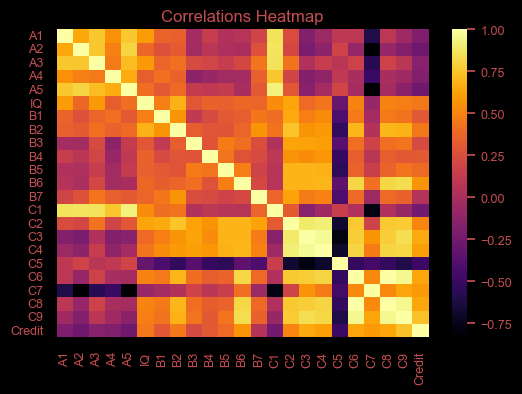

In [14]:
# Print heatmap of correlations
sns.set(rc={'figure.figsize':(6,4)}) 

sns.set(rc={'axes.facecolor':'black','figure.facecolor':'black','grid.alpha': 0.2,'axes.edgecolor':'white','text.color':'r','xtick.labelsize': '9.0','ytick.labelsize': '9.0','xtick.color':'r','ytick.color':'r'})
sns.heatmap(df.corr(), cmap="inferno")
plt.title('Correlations Heatmap')


In [16]:
# Normalize X values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)

df = pd.DataFrame(df)

In [17]:
corr = df.corr()

In [18]:
print(corr)

              A1        A2        A3        A4        A5        IQ        B1  \
A1      1.000000  0.646601  0.763266  0.550608  0.758801  0.594445  0.358347   
A2      0.646601  1.000000  0.753852  0.491478  0.809727  0.379384  0.267003   
A3      0.763266  0.753852  1.000000  0.458418  0.715119  0.589773  0.363356   
A4      0.550608  0.491478  0.458418  1.000000  0.661476  0.336759  0.414588   
A5      0.758801  0.809727  0.715119  0.661476  1.000000  0.407735  0.306496   
IQ      0.594445  0.379384  0.589773  0.336759  0.407735  1.000000  0.480854   
B1      0.358347  0.267003  0.363356  0.414588  0.306496  0.480854  1.000000   
B2      0.347351  0.316329  0.413070  0.354388  0.391595  0.682019  0.566676   
B3     -0.018860 -0.030640  0.224546 -0.138196  0.123394  0.294978  0.107692   
B4      0.136004  0.078909  0.191363 -0.083045  0.100462  0.354519  0.221880   
B5      0.030778  0.022449  0.138959 -0.032217  0.124345  0.342893  0.308444   
B6      0.054994  0.009818  0.210618 -0.

In [19]:
# Print correlations to credit
correlation_matrix = df.corr()
correlation_matrix["Credit"]

A1       -0.189298
A2       -0.267846
A3       -0.155673
A4       -0.182493
A5       -0.262671
IQ        0.450876
B1        0.301557
B2        0.454498
B3        0.225113
B4        0.311059
B5        0.395715
B6        0.567935
B7        0.054490
C1       -0.248001
C2        0.510441
C3        0.652890
C4        0.606919
C5       -0.494202
C6        0.634984
C7        0.588386
C8        0.634984
C9        0.737768
Credit    1.000000
Name: Credit, dtype: float64

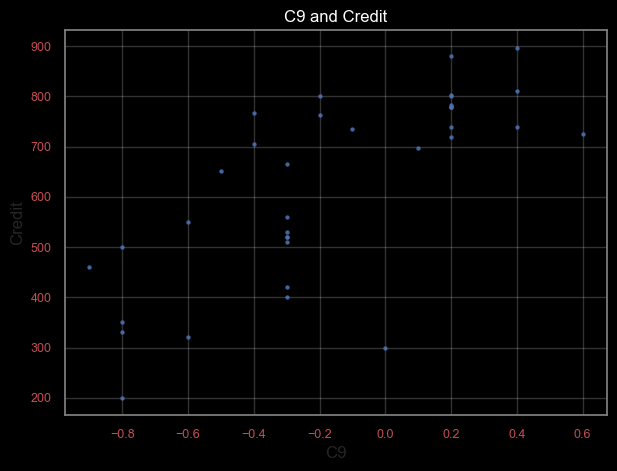

In [15]:
sns.set(rc={'figure.figsize':(7,5)})
sns.set(rc={'axes.facecolor':'black','figure.facecolor':'black','grid.alpha': 0.2,'axes.edgecolor':'grey','text.color':'white','xtick.labelsize': '9.0','ytick.labelsize': '9.0','xtick.color':'r','ytick.color':'r'})
sns.scatterplot(x='C9', y='Credit', data=df, edgecolor='b', s=8, alpha=0.9, legend='full')
plt.title('C9 and Credit')
plt.xlabel('C9')
plt.ylabel('Credit')
plt.savefig('C9andCredit')

In [18]:
G = nx.Graph()

In [19]:
A = np.array(corr)

In [20]:
G = nx.from_numpy_array(A)

In [21]:
G.edges(data=True)

EdgeDataView([(0, 0, {'weight': 1.0}), (0, 1, {'weight': 0.6466007713678714}), (0, 2, {'weight': 0.7632660356496682}), (0, 3, {'weight': 0.5506080499195746}), (0, 4, {'weight': 0.7588006993908049}), (0, 5, {'weight': 0.5944447813735951}), (0, 6, {'weight': 0.3583470773350791}), (0, 7, {'weight': 0.34735091365884413}), (0, 8, {'weight': -0.018860372491319843}), (0, 9, {'weight': 0.1360040801836092}), (0, 10, {'weight': 0.030777929058378593}), (0, 11, {'weight': 0.054994472357094155}), (0, 12, {'weight': 0.18860372491319943}), (0, 13, {'weight': 0.8634247386551387}), (0, 14, {'weight': 0.2371711600311434}), (0, 15, {'weight': -0.17585890552594943}), (0, 16, {'weight': -0.06611659408826989}), (0, 17, {'weight': 0.09456588557900605}), (0, 18, {'weight': 0.08997736024293412}), (0, 19, {'weight': -0.6080678329801789}), (0, 20, {'weight': 0.08997736024293407}), (0, 21, {'weight': -0.04863484221386288}), (0, 22, {'weight': -0.18929801658423132}), (1, 1, {'weight': 1.0}), (1, 2, {'weight': 0.75

In [22]:
G.remove_edges_from(nx.selfloop_edges(G))

In [23]:
def curved_edges(G, pos, dist_ratio=0.2, bezier_precision=80, polarity='random'):
    # Get nodes into np array
    edges = np.array(G.edges())
    l = edges.shape[0]

    if polarity == 'random':
        # Random polarity of curve
        rnd = np.where(np.random.randint(2, size=l)==0, -1, 1)
    else:
        # Create a fixed (hashed) polarity column in the case we use fixed polarity
        # This is useful, e.g., for animations
        rnd = np.where(np.mod(np.vectorize(hash)(edges[:,0])+np.vectorize(hash)(edges[:,1]),2)==0,-1,1)
    
    # Coordinates (x,y) of both nodes for each edge
    # e.g., https://stackoverflow.com/questions/16992713/translate-every-element-in-numpy-array-according-to-key
    # Note the np.vectorize method doesn't work for all node position dictionaries for some reason
    u, inv = np.unique(edges, return_inverse = True)
    coords = np.array([pos[x] for x in u])[inv].reshape([edges.shape[0], 2, edges.shape[1]])
    coords_node1 = coords[:,0,:]
    coords_node2 = coords[:,1,:]
    
    # Swap node1/node2 allocations to make sure the directionality works correctly
    should_swap = coords_node1[:,0] > coords_node2[:,0]
    coords_node1[should_swap], coords_node2[should_swap] = coords_node2[should_swap], coords_node1[should_swap]
    
    # Distance for control points
    dist = dist_ratio * np.sqrt(np.sum((coords_node1-coords_node2)**2, axis=1))

    # Gradients of line connecting node & perpendicular
    m1 = (coords_node2[:,1]-coords_node1[:,1])/(coords_node2[:,0]-coords_node1[:,0])
    m2 = -1/m1

    # Temporary points along the line which connects two nodes
    # e.g., https://math.stackexchange.com/questions/656500/given-a-point-slope-and-a-distance-along-that-slope-easily-find-a-second-p
    t1 = dist/np.sqrt(1+m1**2)
    v1 = np.array([np.ones(l),m1])
    coords_node1_displace = coords_node1 + (v1*t1).T
    coords_node2_displace = coords_node2 - (v1*t1).T

    # Control points, same distance but along perpendicular line
    # rnd gives the 'polarity' to determine which side of the line the curve should arc
    t2 = dist/np.sqrt(1+m2**2)
    v2 = np.array([np.ones(len(edges)),m2])
    coords_node1_ctrl = coords_node1_displace + (rnd*v2*t2).T
    coords_node2_ctrl = coords_node2_displace + (rnd*v2*t2).T

    # Combine all these four (x,y) columns into a 'node matrix'
    node_matrix = np.array([coords_node1, coords_node1_ctrl, coords_node2_ctrl, coords_node2])

    # Create the Bezier curves and store them in a list
    curveplots = []
    for i in range(l):
        nodes = node_matrix[:,i,:].T
        curveplots.append(bezier.Curve(nodes, degree=3).evaluate_multi(np.linspace(0,1,bezier_precision)).T)
      
    # Return an array of these curves
    curves = np.array(curveplots)
    return curves

100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 2499.88it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


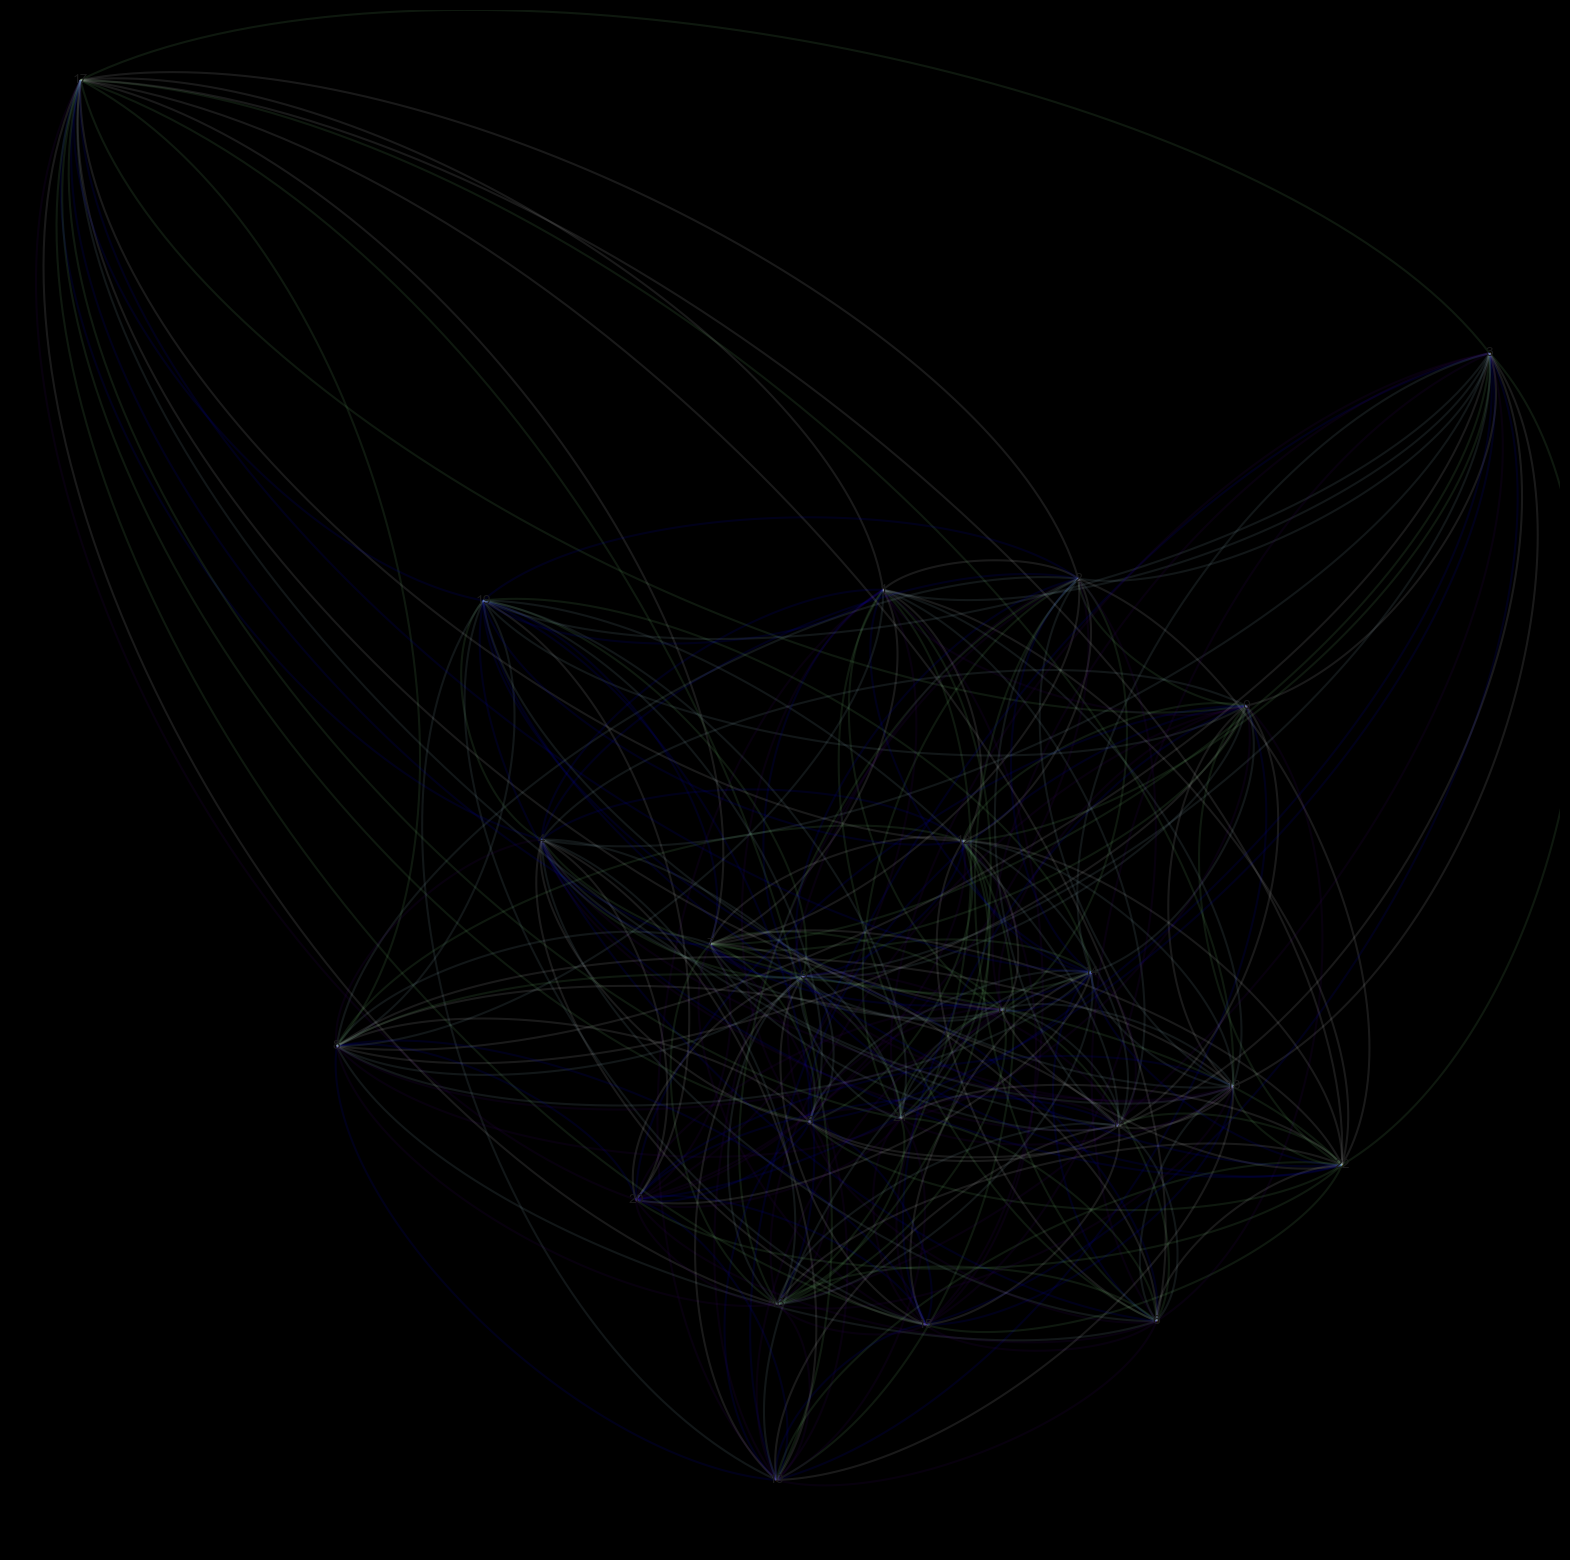

In [24]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=0.5,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=0.5,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=1.0,
                        strongGravityMode=True,
                        gravity=0.1,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=5)
curves = curved_edges(G, positions)
lc = LineCollection(curves, color=['indigo','lightgreen','white','lightblue','blue'], alpha=0.1)
plt.figure(figsize=(20,20))
nx.draw_networkx_labels(G, positions, font_size=10)
nx.draw_networkx_nodes(G, positions, node_size=0.1, node_color="orange",alpha=0.3)

plt.gca().add_collection(lc)
plt.axis('off')
plt.show()


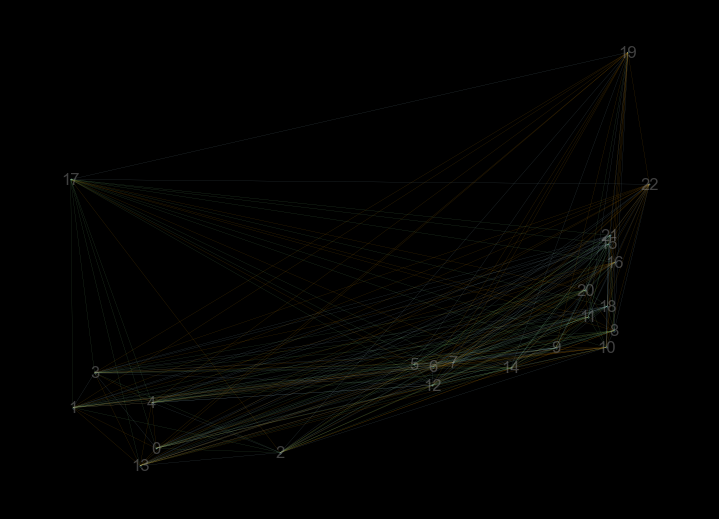

In [25]:
fig = plt.figure()
nx.draw(G, with_labels=True, font_color='grey',edge_color=['orange','lightgreen','lightblue'], node_color='skyblue',node_size=0.1,width=0.1,alpha=0.5)
fig.set_facecolor("Black")

In [26]:
G.number_of_edges()

253

In [27]:
G.number_of_nodes()

23